In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importing sklear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
# loading the car dataset
df = pd.read_csv('../dataset/CAR DETAILS FROM CAR DEKHO.csv')
df.head(2)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [8]:
df.shape

(4340, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [14]:
# checking the distribution of categorical data
categorical_column = df.select_dtypes(include=['object','category']).columns
categorical_column

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [17]:
for i in categorical_column:
    print(f"Distribution of feature : {i}")
    print(df[i].value_counts())
    print("------------------")

Distribution of feature : name
name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64
------------------
Distribution of feature : fuel
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
------------------
Distribution of feature : seller_type
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
------------------
Distribution of feature : transmission
transmission
Manual     

In [18]:
#encoding the categorical variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [21]:
one_hot  = OneHotEncoder(sparse_output=False, drop='first')
hot_encoded_data = one_hot.fit_transform(df[[ 'fuel', 'seller_type', 'transmission', 'owner']])
hot_encoded_data


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
encoded_df = pd.DataFrame(hot_encoded_data, columns=one_hot.get_feature_names_out([ 'fuel', 'seller_type', 'transmission', 'owner']))

In [23]:
encoded_df

,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4335,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4336,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4337,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4338,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
df = pd.concat([df,encoded_df], axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [25]:
df.drop([ 'fuel', 'seller_type', 'transmission', 'owner'], axis=1, inplace=True)


In [26]:
df.head()

,name,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Datsun RediGO T Option,2017,250000,46000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [28]:
#similarly for label encoder
label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])


In [29]:
df.head()

,name,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,775,2007,60000,70000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1041,2007,135000,50000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,505,2012,600000,100000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,118,2017,250000,46000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,279,2014,450000,141000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [30]:
# let split the dataset
X = df.drop(['name','selling_price'], axis=1)
y = df['selling_price']



In [31]:
df.shape

(4340, 15)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)


## Model training

In [34]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [35]:
training_data_prediction = lin_reg_model.predict(X_test)

In [36]:
training_data_prediction

array([ 465688.87950072, 1381000.60717969,  231240.86410993,
       1393457.43659912,  737939.55230136,  435194.56811163,
        399652.71965249,  -72724.91047364,  305402.93281296,
        511298.94680054,  239227.58506721,   75858.18953238,
       1215640.67623651,  662693.19364712,  -83116.37593046,
       1610419.7565695 ,  577702.35487141,  594641.24347298,
       1415426.96673074,  395082.66725267,  669326.27273448,
        390710.00832179,   69352.60796089, 1212186.52155568,
       1582680.95793059,  435194.56811163, 1506617.13049378,
        714733.70920162,  274504.63350593,  435495.16497602,
        309045.55389065,   56137.05331187,  783129.93169147,
        607986.26025468,   50561.86083908, 1415426.96673074,
        498246.60637161,  339273.64235985,  520496.84836067,
        506233.32732889,  823976.66566341,  951607.99898259,
       1368101.55871502,  741181.02233239, 1799643.06260702,
        257355.33889852,  580090.49563451,  575654.94036546,
        642258.31109174,

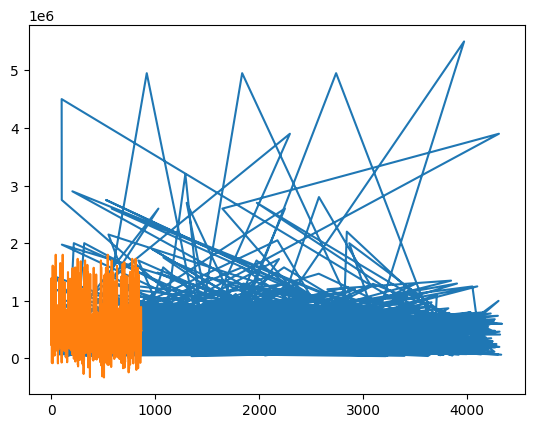

In [38]:
# actual vs predicted 
plt.plot(y_test)
plt.plot(training_data_prediction)

In [39]:
# R squared Error
error_score = r2_score(y_test, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5049862116484176


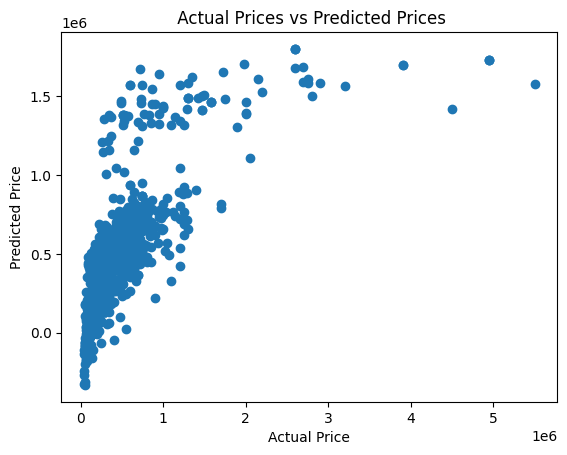

In [41]:
plt.scatter(y_test, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Lasso

In [46]:
lass_reg = Lasso(alpha=0.5)
lass_reg.fit(X_train, y_train)

Lasso(alpha=0.5)

In [47]:
test_lasso = lass_reg.predict(X_test)
test_lasso

array([ 465693.64093995, 1380994.44041817,  231238.76473576,
       1393446.74716988,  737942.39475383,  435199.69279744,
        399653.12701356,  -72724.26329564,  305405.66175154,
        511304.22224072,  239230.17378497,   75868.03594986,
       1215633.79841687,  662694.16383253,  -83144.83784175,
       1610410.29855651,  577702.30366348,  594642.53706068,
       1415421.30210555,  395087.28377044,  669308.62348711,
        390708.29187833,   69355.26832253, 1212173.31174925,
       1582671.86608745,  435199.69279744, 1506606.16551635,
        714735.20020993,  274509.83957985,  435499.16025057,
        309049.61351904,   56146.01759602,  783132.42648816,
        607986.70678842,   50561.06012313, 1415421.30210555,
        498248.04955728,  339271.94136485,  520502.13355875,
        506239.45860651,  823980.06500523,  951587.58017878,
       1368092.02547558,  741183.0070122 , 1799611.17861576,
        257360.06116509,  580090.84255762,  575655.74819693,
        642259.25959811,

In [48]:
# R squared Error
error_score = r2_score(y_test, test_lasso)
print("R squared Error : ", error_score)

R squared Error :  0.5049855880619751


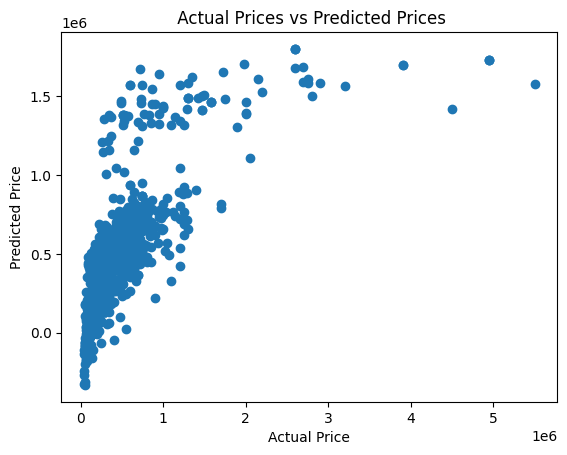

In [49]:
plt.scatter(y_test, test_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [50]:
# Get the coefficients
lasso_coefficients = lass_reg.coef_

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_coefficients})

# Filter out the features with non-zero coefficients
important_features = feature_importance[feature_importance['Coefficient'] != 0]
important_features

,Feature,Coefficient
0,year,35519.882905
1,km_driven,-0.918505
2,fuel_Diesel,282852.803938
3,fuel_Electric,-599446.238193
4,fuel_LPG,40771.598519
5,fuel_Petrol,-11925.171848
6,seller_type_Individual,-66013.831047
7,seller_type_Trustmark Dealer,157503.815899
8,transmission_Manual,-861879.249748
9,owner_Fourth & Above Owner,6488.986759
